In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-payout/expenses.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks")

In [3]:
df = pd.read_csv('/kaggle/input/medical-insurance-payout/expenses.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Predicting factors that affect the Charge variable

In [7]:
#pps_df=pps.matrix(df)
#pps_df

In [8]:
#pps.predictors(df,'charges')

In [9]:
corr=df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

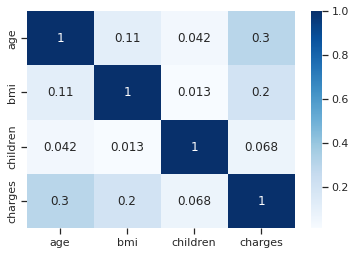

In [10]:
sns.heatmap(corr, cmap='Blues', annot=True)

From the heatmap, bmi and age are the factors that strongly affect medical expenditure/charges.

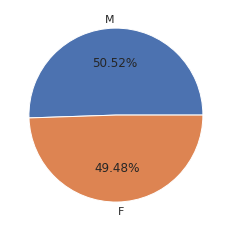

In [11]:
plt.pie(df['sex'].value_counts(),labels=['M','F'],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

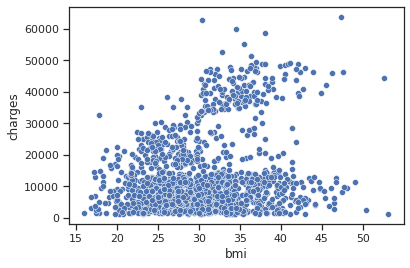

In [12]:
sns.scatterplot(data=df, x='bmi', y='charges')

It can be infered from the scatterplot that on average, the less the BMI, the less charges or expenditure.

<AxesSubplot:xlabel='age', ylabel='charges'>

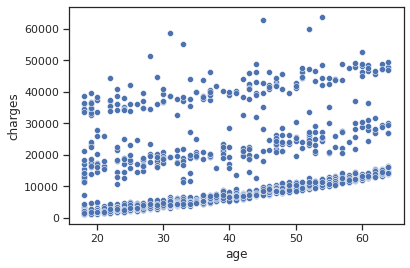

In [13]:
sns.scatterplot(data=df, x='age', y='charges')

On average, older people tend to spend more on medical charges.

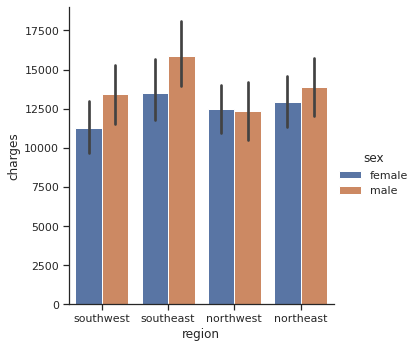

In [14]:
sns.catplot(data=df, x='region', y='charges', kind='bar', hue='sex')

Males tend to pay more charges than females in all regions but 'northwest' though not a big difference.

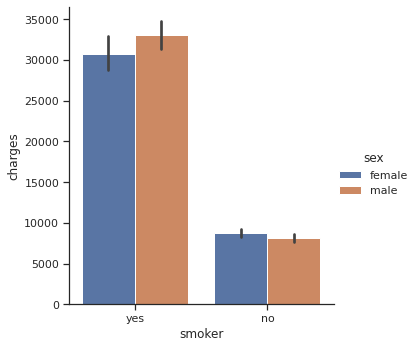

In [15]:
sns.catplot(data=df, x='smoker', y='charges', kind='bar', hue='sex')

Smokers tend to pay more medical charges than non-smokers.

## Dealing with categorical variables

In [16]:
df1 = pd.get_dummies(df, columns=['sex', 'smoker','region'],drop_first=True)
df1.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
df = df1.reindex(columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest','charges'])
df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


In [18]:
#Feature Selection
X = df.iloc[:, :-1]
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [19]:
y=df.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
#Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions =lr.predict(X_test)

In [24]:
lr.score(X_test,y_test)

0.7605492639270064